In [1]:
# Step 1: Import necessary libraries
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data manipulation and visualization
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
from scipy.stats import ttest_ind # for statistical testing
from sklearn.linear_model import LinearRegression # for regression analysis
from sklearn.metrics import mean_squared_error # for regression evaluation

In [2]:
# Step 2: Load the dataset (after downloading 'student-mat.csv' from UCI ML repo)
df = pd.read_csv("C:/Users/harag/OneDrive/Desktop/DATA PLUS Rwanda/student-mat.csv")

In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/harag/OneDrive/Desktop/DATA PLUS Rwanda/student-mat.csv")

In [4]:
df.tail() # Display the last few rows of the dataset to understand its structure and contents

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5.0,5.0,4.0,4.0,5.0,4.0,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2.0,4.0,5.0,3.0,4.0,2.0,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5.0,5.0,3.0,3.0,3.0,3.0,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3.0,2.0,3.0,3.0,3.0,5.0,5,8,9,9


In [5]:
df.columns # Display the columns of the dataset to understand its structure and contents

Index(['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status',
       'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class',
       'extra_curr_activities', 'nursery', 'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
       'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [6]:
descritive_statistic=df.describe() # Display descriptive statistics of the dataset
descritive_statistic # display descriptive statistics   
descritive_statistic.T # display transposed descriptive statiatics

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Mother_edu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Father_edu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,394.0,1.449239,0.698025,1.0,1.0,1.0,2.0,4.0
weekly_studytime,393.0,2.035623,0.841375,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
Family_quality_reln,394.0,3.946701,0.896531,1.0,4.0,4.0,5.0,5.0
freetime_after_school,391.0,3.230179,1.009295,0.0,3.0,3.0,4.0,5.0
goout_with_friends,394.0,3.111675,1.113286,1.0,2.0,3.0,4.0,5.0
workday_alcohol_consum,382.0,1.492147,0.901263,1.0,1.0,1.0,2.0,5.0


In [7]:
summary_statistics=df.describe() # Display summary statistics of the dataset
summary_statistics # display summary statistics


,age,Mother_edu,Father_edu,traveltime,weekly_studytime,failures,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,394.000000,393.000000,395.000000,394.000000,391.000000,394.000000,382.000000,393.000000,386.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.449239,2.035623,0.334177,3.946701,3.230179,3.111675,1.492147,2.297710,3.562176,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.698025,0.841375,0.743651,0.896531,1.009295,1.113286,0.901263,1.287863,1.385460,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
# Step 3: Display basic information
print("Basic Information:")
print(df.info())  # Display basic information about the dataset, including data types and non-null counts


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   school                    395 non-null    object 
 1   sex                       395 non-null    object 
 2   age                       395 non-null    int64  
 3   address                   395 non-null    object 
 4   famsize                   395 non-null    object 
 5   Parrent_status            395 non-null    object 
 6   Mother_edu                395 non-null    int64  
 7   Father_edu                395 non-null    int64  
 8   Mother_job                395 non-null    object 
 9   Father_job                395 non-null    object 
 10  reason_to_chose_school    395 non-null    object 
 11  guardian                  395 non-null    object 
 12  traveltime                394 non-null    float64
 13  weekly_studytime          393 non-null    floa

In [9]:
df.isna().sum() # Display the number of missing values in each column

school                       0
sex                          0
age                          0
address                      0
famsize                      0
Parrent_status               0
Mother_edu                   0
Father_edu                   0
Mother_job                   0
Father_job                   0
reason_to_chose_school       0
guardian                     0
traveltime                   1
weekly_studytime             2
failures                     0
extra_edu_supp               1
family_edu_supp              1
extra_paid_class             1
extra_curr_activities        0
nursery                      1
Interested_in_higher_edu     0
internet_access              0
romantic_relationship        1
Family_quality_reln          1
freetime_after_school        4
goout_with_friends           1
workday_alcohol_consum      13
weekend_alcohol_consum       2
health_status                9
absences                     0
G1                           0
G2                           0
G3      

In [10]:
# Data Cleaning Steps
# 1. Check for missing values
print('Missing values per column:') # Display the number of missing values in each column
print(df.isnull().sum()) # Display the number of missing values in each column

# 2. Remove duplicate rows
initial_shape = df.shape # Display the initial shape of the DataFrame
df = df.drop_duplicates() # Remove duplicate rows
print(f'Removed {initial_shape[0] - df.shape[0]} duplicate rows.') # Display the number of duplicate rows removed

# 3. Check and convert data types if needed
print('Data types:') # Display the data types of each column
print(df.dtypes) # Display the data types of each column

# 4. (Optional) Handle outliers or invalid values
# Example: Remove rows where G3 (final grade) is negative or above 20
if 'G3' in df.columns:
    df = df[(df['G3'] >= 0) & (df['G3'] <= 20)] # Filter out rows with G3 values outside the valid range
    print('Filtered G3 outliers.') # Display the number of rows after filtering outliers

Missing values per column:
school                       0
sex                          0
age                          0
address                      0
famsize                      0
Parrent_status               0
Mother_edu                   0
Father_edu                   0
Mother_job                   0
Father_job                   0
reason_to_chose_school       0
guardian                     0
traveltime                   1
weekly_studytime             2
failures                     0
extra_edu_supp               1
family_edu_supp              1
extra_paid_class             1
extra_curr_activities        0
nursery                      1
Interested_in_higher_edu     0
internet_access              0
romantic_relationship        1
Family_quality_reln          1
freetime_after_school        4
goout_with_friends           1
workday_alcohol_consum      13
weekend_alcohol_consum       2
health_status                9
absences                     0
G1                           0
G2          

In [11]:
# Handle missing values
# Fill numerical columns with mean
num_cols = ['traveltime', 'weekly_studytime','freetime_after_school'] # List of numerical columns to fill with mean
for col in num_cols:
    if col in df.columns:  # Check if the column exists in the DataFrame
        df[col].fillna(df[col].mean(), inplace=True)  # Fill numerical columns with mean

# Fill categorical columns with mode
cat_cols = ['extra_edu_supp', 'family_edu_supp', 'extra_paid_class', 'nursery', 'romantic_relationship', 'Family_quality_reln'] # List of categorical columns to fill with mode
for col in cat_cols:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True) # Fill categorical columns with mode

print('Missing values handled.') 

Missing values handled.


C:\Users\harag\AppData\Local\Temp\ipykernel_16868\357859645.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill numerical columns with mean
C:\Users\harag\AppData\Local\Temp\ipykernel_16868\357859645.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [12]:
df.isna().sum() # check again for missing values

school                       0
sex                          0
age                          0
address                      0
famsize                      0
Parrent_status               0
Mother_edu                   0
Father_edu                   0
Mother_job                   0
Father_job                   0
reason_to_chose_school       0
guardian                     0
traveltime                   0
weekly_studytime             0
failures                     0
extra_edu_supp               0
family_edu_supp              0
extra_paid_class             0
extra_curr_activities        0
nursery                      0
Interested_in_higher_edu     0
internet_access              0
romantic_relationship        0
Family_quality_reln          0
freetime_after_school        0
goout_with_friends           1
workday_alcohol_consum      13
weekend_alcohol_consum       2
health_status                9
absences                     0
G1                           0
G2                           0
G3      

In [13]:
# Step 4: Summary statistics
print("\nSummary Statistics:") # Display summary statistics of the dataset
print(df.describe()) # Display summary statistics of the dataset


Summary Statistics:
              age  Mother_edu  Father_edu  traveltime  weekly_studytime  \
count  395.000000  395.000000  395.000000  395.000000        395.000000   
mean    16.696203    2.749367    2.521519    1.449239          2.035623   
std      1.276043    1.094735    1.088201    0.697138          0.839237   
min     15.000000    0.000000    0.000000    1.000000          1.000000   
25%     16.000000    2.000000    2.000000    1.000000          1.000000   
50%     17.000000    3.000000    2.000000    1.000000          2.000000   
75%     18.000000    4.000000    3.000000    2.000000          2.000000   
max     22.000000    4.000000    4.000000    4.000000          4.000000   

         failures  Family_quality_reln  freetime_after_school  \
count  395.000000           395.000000             395.000000   
mean     0.334177             3.946835               3.230179   
std      0.743651             0.895396               1.004159   
min      0.000000             1.000000     

In [14]:
df.head() # Display the first few rows of the cleaned dataset to verify the changes

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2.0,3.0,NaN,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4,6,10,10


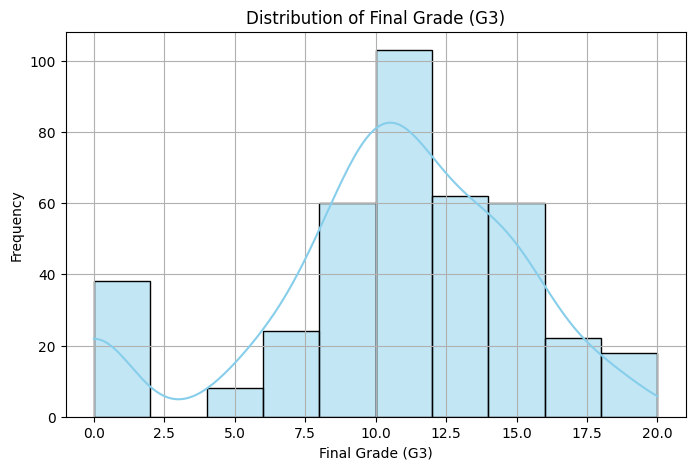

In [15]:
# Step 5: Distribution of final grade (G3)
plt.figure(figsize=(8, 5)) # Create a figure with specified size
sns.histplot(df['G3'], bins=10, kde=True, color='skyblue') # Plot histogram with kernel density estimate
plt.title("Distribution of Final Grade (G3)") # Set the title of the plot
plt.xlabel("Final Grade (G3)") # Set the x-axis label
plt.ylabel("Frequency") # Set the y-axis label
plt.grid(True) # Add grid lines for better readability
plt.savefig("g3_distribution.png") # Save the plot as an image file
plt.show() # Display the plot

# Inferential Statistics: Common Tests and When to Use Them

In this section, we will perform several statistical tests and analyses on the dataset. For each test, we explain when and why to use it, and show how to do it in Python.

**Tests included:**
- Chi-square test (for association between two categorical variables)
- T-test (for comparing means between two groups)
- Independent t-test (for comparing means between two independent groups)
- Correlation analysis (for measuring the relationship between two numerical variables)
- Regression analysis (for predicting a numerical outcome)
- Logistic regression (for predicting a binary outcome)

Each test will include a scenario explaining when and how to use it.

# Documentation: Inferential Statistics Performed

This notebook includes several inferential statistical tests to help you analyze your dataset and answer important questions. Here is a summary of what was done and why:

1. **Chi-square Test**
   - **Purpose:** To check if there is a relationship between two categorical variables (e.g., gender and passing status).
   - **How:** We created a new column for passing (G3 >= 10), built a contingency table for gender and passing, and used the chi2_contingency function to test for association.
   - **Interpretation:** If the p-value is less than 0.05, there is a significant association between the two variables.

2. **T-test (Independent Samples)**
   - **Purpose:** To compare the means of a numerical variable (e.g., final grade) between two independent groups (e.g., male and female students).
   - **How:** We separated grades by gender and used ttest_ind to test if the means are different.
   - **Interpretation:** If the p-value is less than 0.05, the means are significantly different.

3. **Correlation Analysis**
   - **Purpose:** To measure the strength and direction of the relationship between two numerical variables (e.g., G1 and G3).
   - **How:** We used the .corr() method and visualized the relationship with a scatter plot.
   - **Interpretation:** A correlation close to 1 or -1 means a strong relationship; close to 0 means weak or no relationship.

4. **Regression Analysis**
   - **Purpose:** To predict a numerical outcome (e.g., final grade G3) from one or more predictor variables (e.g., G1 and G2).
   - **How:** We used LinearRegression to fit a model and checked the coefficients and mean squared error.
   - **Interpretation:** The coefficients show how much each predictor affects the outcome. Lower mean squared error means better predictions.

5. **Logistic Regression**
   - **Purpose:** To predict a binary outcome (e.g., pass/fail) from one or more predictors (e.g., G1 and G2).
   - **How:** We used LogisticRegression to fit a model and checked the coefficients and accuracy.
   - **Interpretation:** The coefficients show the effect of each predictor on the probability of passing. Higher accuracy means better predictions.

Each test includes code, comments, and explanations to help you understand when and how to use them.

## 1. Chi-square Test

**Scenario:** Use the Chi-square test to check if there is a relationship between two categorical variables. For example, is there an association between gender and whether a student passed?

**When to use:**
- Both variables are categorical (e.g., Male/Female, Yes/No)
- You want to know if the distribution of one variable is different depending on the other

**Example:** Is there a relationship between 'sex' and 'passed' (G3 >= 10)?

In [16]:
# Create a new column for passing (G3 >= 10 means pass)
df['passed'] = (df['G3'] >= 10).astype(int)

# Create a contingency table for sex and passed
contingency_table = pd.crosstab(df['sex'], df['passed'])

from scipy.stats import chi2_contingency

# Perform the Chi-square test
test_stat, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-square test statistic:', test_stat)
print('p-value:', p)
if p < 0.05:
    print('There is a significant association between gender and passing.')
else:
    print('There is no significant association between gender and passing.')

Chi-square test statistic: 1.680311069367968
p-value: 0.19488312384342535
There is no significant association between gender and passing.


## 2. T-test (Independent Samples)

**Scenario:** Use the t-test to compare the means of a numerical variable between two independent groups. For example, do male and female students have different average final grades?

**When to use:**
- The outcome variable is numerical (e.g., grades)
- The grouping variable has two independent groups (e.g., Male/Female)

**Example:** Compare the average final grade (G3) between male and female students.

In [17]:
# Get grades for each group
male_grades = df[df['sex'] == 'M']['G3']
female_grades = df[df['sex'] == 'F']['G3']

from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_value = ttest_ind(male_grades, female_grades)

print('T-test statistic:', t_stat)
print('p-value:', p_value)
if p_value < 0.05:
    print('There is a significant difference in average grades between male and female students.')
else:
    print('There is no significant difference in average grades between male and female students.')

T-test statistic: 2.061992815503971
p-value: 0.039865332341527636
There is a significant difference in average grades between male and female students.


## 3. Correlation Analysis

**Scenario:** Use correlation analysis to measure the strength and direction of the relationship between two numerical variables. For example, do students who score high in the first period (G1) also score high in the final grade (G3)?

**When to use:**
- Both variables are numerical (e.g., test scores)
- You want to know if higher values in one variable are associated with higher (or lower) values in another

**Example:** Check the correlation between G1 and G3.

Correlation between G1 and G3: 0.8014679320174141


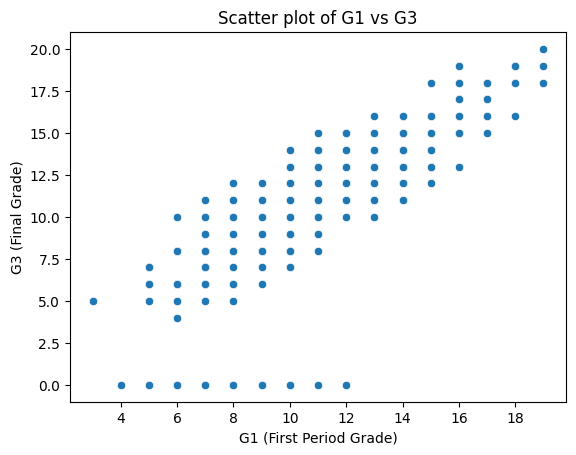

In [18]:
# Calculate the correlation between G1 and G3
correlation = df['G1'].corr(df['G3'])
print('Correlation between G1 and G3:', correlation)

# You can also visualize the relationship with a scatter plot
sns.scatterplot(x=df['G1'], y=df['G3'])
plt.title('Scatter plot of G1 vs G3')
plt.xlabel('G1 (First Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.show()

## 4. Regression Analysis

**Scenario:** Use regression analysis to predict a numerical outcome from one or more predictor variables. For example, can we predict the final grade (G3) using the grades from the first two periods (G1 and G2)?

**When to use:**
- The outcome variable is numerical (e.g., grades)
- You want to predict the outcome using one or more variables

**Example:** Predict G3 using G1 and G2.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['G1', 'G2']]  # Predictor variables
y = df['G3']          # Target variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Show results
print('Regression coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mean_squared_error(y, y_pred))

Regression coefficients: [0.15326859 0.98686684]
Intercept: -1.8300121405807364
Mean Squared Error: 3.7232755761316105


## 5. Logistic Regression

**Scenario:** Use logistic regression to predict a binary outcome (yes/no, pass/fail) from one or more predictor variables. For example, can we predict whether a student will pass (G3 >= 10) using their grades from the first two periods (G1 and G2)?

**When to use:**
- The outcome variable is binary (e.g., pass/fail)
- You want to predict the probability of an event happening

**Example:** Predict passing status using G1 and G2.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data
X = df[['G1', 'G2']]
y = (df['G3'] >= 10).astype(int)  # 1 if pass, 0 if fail

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Make predictions
predictions = logreg.predict(X)

# Show results
print('Logistic Regression coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
print('Accuracy:', accuracy_score(y, predictions))

Logistic Regression coefficients: [[0.17232699 1.6448223 ]]
Intercept: [-16.59960991]
Accuracy: 0.9189873417721519


In [21]:
# Step 6: Hypothesis Testing (Are average grades different by gender?)
male_grades = df[df['sex'] == 'M']['G3'] # Filter grades
female_grades = df[df['sex'] == 'F']['G3'] # Filter grades
t_stat, p_value = ttest_ind(male_grades, female_grades) # Perform t-test


In [22]:
print(f"\nHypothesis Test - Comparing G3 by Gender:") # Display hypothesis test results
print(f"T-statistic = {t_stat:.3f}, P-value = {p_value:.4f}")# Display t-statistic and p-value
if p_value < 0.05:
    print("=> Statistically significant difference between male and female grades.") # Display conclusion based on p-value
else:
    print("=> No statistically significant difference.") # Display conclusion based on p-value

# Step 7: Simple Linear Regression (Predict G3 using G1 and G2)
X = df[['G1', 'G2']]  # Features: Grades from period 1 and 2
y = df['G3']          # Target: Final grade


Hypothesis Test - Comparing G3 by Gender:
T-statistic = 2.062, P-value = 0.0399
=> Statistically significant difference between male and female grades.


In [23]:
model = LinearRegression() # Create a linear regression model
model.fit(X, y) # Fit the model to the data
y_pred = model.predict(X) # Predict G3 using G1 and G2``

In [24]:
mse = mean_squared_error(y, y_pred) # Calculate Mean Squared Error
print(f"\nLinear Regression Results:") # Display linear regression results
print(f"Coefficients: G1 = {model.coef_[0]:.2f}, G2 = {model.coef_[1]:.2f}") # Display coefficients for G1 and G2
print(f"Intercept: {model.intercept_:.2f}") # Display intercept of the regression model
print(f"Mean Squared Error: {mse:.2f}") # Display Mean Squared Error


Linear Regression Results:
Coefficients: G1 = 0.15, G2 = 0.99
Intercept: -1.83
Mean Squared Error: 3.72


In [25]:
# 7. Predict G3 using G1 and G2 (simple linear regression)
model = LinearRegression() # Create a linear regression model
model.fit(df[['G1', 'G2']], df['G3']) # Fit the model to the data
print("Regression coefficients:", model.coef_) # Display regression coefficients
print("Intercept:", model.intercept_) # Display intercept of the regression model

Regression coefficients: [0.15326859 0.98686684]
Intercept: -1.8300121405807364
